In [1]:
pip install langdetect

  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993331 sha256=cd492b8ae899db0cb8369e01af1a6cb817e14eae8bbfcaaa3ad3c67eb2d66dff
  Stored in directory: /Users/yunkaili/Library/Caches/pip/wheels/c1/67/88/e844b5b022812e15a52e4eaa38a1e709e99f06f6639d7e3ba7
Successfully built langdetect

[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: pip3.12 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [19]:
# English language filtering for Community Notes
# This script filters the Community Notes dataset to keep only English notes

import pandas as pd
import numpy as np
from langdetect import detect, LangDetectException
import os
from tqdm.notebook import tqdm
import re

# Define file paths
input_filepath = "../data/raw/notes-00000.tsv"
output_filepath = "../data/english_only/english_notes-00000.tsv"

# Create output directory if it doesn't exist
os.makedirs(os.path.dirname(output_filepath), exist_ok=True)

In [10]:
# Function to detect language with error handling
def detect_language(text):
    try:
        # Check if text is NaN or empty
        if pd.isna(text) or text.strip() == '':
            return 'unknown'
        
        # Clean text - remove URLs, mentions, hashtags and special characters
        cleaned_text = re.sub(r'http\S+|@\S+|#\S+', '', text)
        cleaned_text = re.sub(r'[^\w\s]', '', cleaned_text)
        
        if cleaned_text.strip() == '':
            return 'unknown'
            
        # Detect language
        return detect(cleaned_text)
    except LangDetectException:
        return 'unknown'

# Read the TSV file
print("Reading the TSV file...")
notes_df = pd.read_csv(input_filepath, sep='\t')

# Display basic information about the data
print(f"Total number of notes: {len(notes_df)}")
display(notes_df.head())
print(notes_df.columns.tolist())

# Check if 'summary' column exists
if 'summary' not in notes_df.columns:
    raise ValueError("The 'summary' column is not found in the dataset.")

# Detect language for each note's summary
print("Detecting language for each note's summary...")
tqdm.pandas()
notes_df['language'] = notes_df['summary'].progress_apply(detect_language)

Reading the TSV file...


/var/folders/r1/2mcrr6nx5hg7d13ln1lw2l5w0000gn/T/ipykernel_6401/2467192011.py:22: DtypeWarning: Columns (5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  notes_df = pd.read_csv(input_filepath, sep='\t')


Total number of notes: 1750611


,noteId,noteAuthorParticipantId,createdAtMillis,tweetId,classification,believable,harmful,validationDifficulty,misleadingOther,misleadingFactualError,...,misleadingUnverifiedClaimAsFact,misleadingSatire,notMisleadingOther,notMisleadingFactuallyCorrect,notMisleadingOutdatedButNotWhenWritten,notMisleadingClearlySatire,notMisleadingPersonalOpinion,trustworthySources,summary,isMediaNote
0,1783179305159200982,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978050878,1783159712986382830,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,The House failed to pass a border protection l...,0
1,1783181538789605871,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978583415,1783171851818021181,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,1,...,1,0,0,0,0,0,0,1,The United States has 50 States https://da...,0
2,1783182562279494134,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1713978827435,1783154445682979015,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,0,0,...,0,0,0,0,0,0,0,1,TikTok only mentions “ban” and chooses to igno...,0
3,1883711635770196070,C784F04F26E124F4D6EC01658D8F5565005D3092741FB3...,1737946826294,1883619411774345444,MISINFORMED_OR_POTENTIALLY_MISLEADING,NaN,NaN,NaN,1,0,...,0,0,0,0,0,0,0,1,This could be considered a threat https://...,0
4,1537142913737428992,5684B38EB58FD8BE75ABA37F0BE040EC70380B002ADF9D...,1655318404027,1377030478167937024,MISINFORMED_OR_POTENTIALLY_MISLEADING,BELIEVABLE_BY_MANY,CONSIDERABLE_HARM,EASY,0,1,...,1,0,0,0,0,0,0,1,Forbes has a good rundown of the investigation...,0


['noteId', 'noteAuthorParticipantId', 'createdAtMillis', 'tweetId', 'classification', 'believable', 'harmful', 'validationDifficulty', 'misleadingOther', 'misleadingFactualError', 'misleadingManipulatedMedia', 'misleadingOutdatedInformation', 'misleadingMissingImportantContext', 'misleadingUnverifiedClaimAsFact', 'misleadingSatire', 'notMisleadingOther', 'notMisleadingFactuallyCorrect', 'notMisleadingOutdatedButNotWhenWritten', 'notMisleadingClearlySatire', 'notMisleadingPersonalOpinion', 'trustworthySources', 'summary', 'isMediaNote']
Detecting language for each note's summary...


  0%|          | 0/1750611 [00:00<?, ?it/s]

In [11]:
# Display language distribution
language_counts = notes_df['language'].value_counts()
print("Language distribution:")
print(language_counts)

# Filter out non-English notes
english_notes_df = notes_df[notes_df['language'] == 'en']
print(f"Number of English notes: {len(english_notes_df)}")

# Save English notes to a new TSV file
print(f"Saving English notes to {output_filepath}...")
english_notes_df.to_csv(output_filepath, sep='\t', index=False)

print("Done!")

# Optional: Create a list of noteIds for English notes
# This will be useful for filtering other related files in step 1.b
english_note_ids = english_notes_df['noteId'].tolist()
np.save("../english_only/english_note_ids.npy", english_note_ids)
print(f"Saved {len(english_note_ids)} English note IDs to english_note_ids.npy")

Language distribution:
language
en         1115518
es          164141
ja          134087
pt           90785
fr           86199
de           46110
it           14544
pl           14292
tr           11352
nl           11166
he           10550
ar            5947
id            5413
fi            4898
ca            4348
vi            3699
cs            3637
sv            3098
hr            2082
fa            1917
af            1786
unknown       1549
no            1255
tl            1126
th             927
da             908
ru             900
ko             854
el             853
hi             808
sl             737
ro             637
et             610
ur             458
sk             450
cy             392
so             376
lt             326
hu             296
bg             248
sw             211
mk             199
lv             193
sq             179
zh-cn          164
ta             148
uk              51
mr              45
ml              44
zh-tw           43
ne              27

## visualization

In [12]:
# Create a pie chart to visualize language distribution in Community Notes
# This code should be run after language detection is completed

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
# mapp the abbreviation to full name
language_fullnames = {
    'en': 'English',
    'es': 'Spanish',
    'fr': 'French',
    'de': 'German',
    'it': 'Italian',
    'pt': 'Portuguese',
    'ru': 'Russian',
    'ja': 'Japanese',
    'zh': 'Chinese',
    'ar': 'Arabic',
    'hi': 'Hindi',
    'ko': 'Korean',
    'nl': 'Dutch',
    'tr': 'Turkish',
    'pl': 'Polish',
    'sv': 'Swedish',
    'fi': 'Finnish',
    'da': 'Danish',
    'no': 'Norwegian',
    'cs': 'Czech',
    'el': 'Greek',
    'hu': 'Hungarian',
    'uk': 'Ukrainian',
    'th': 'Thai',
    'vi': 'Vietnamese',
    'id': 'Indonesian',
    'ms': 'Malay',
    'fa': 'Persian',
    'he': 'Hebrew',
    'ur': 'Urdu',
    'cy': 'Welsh',
    'unknown': 'Unknown'
}

Pie chart saved to ../data/english_only/language_distribution.png


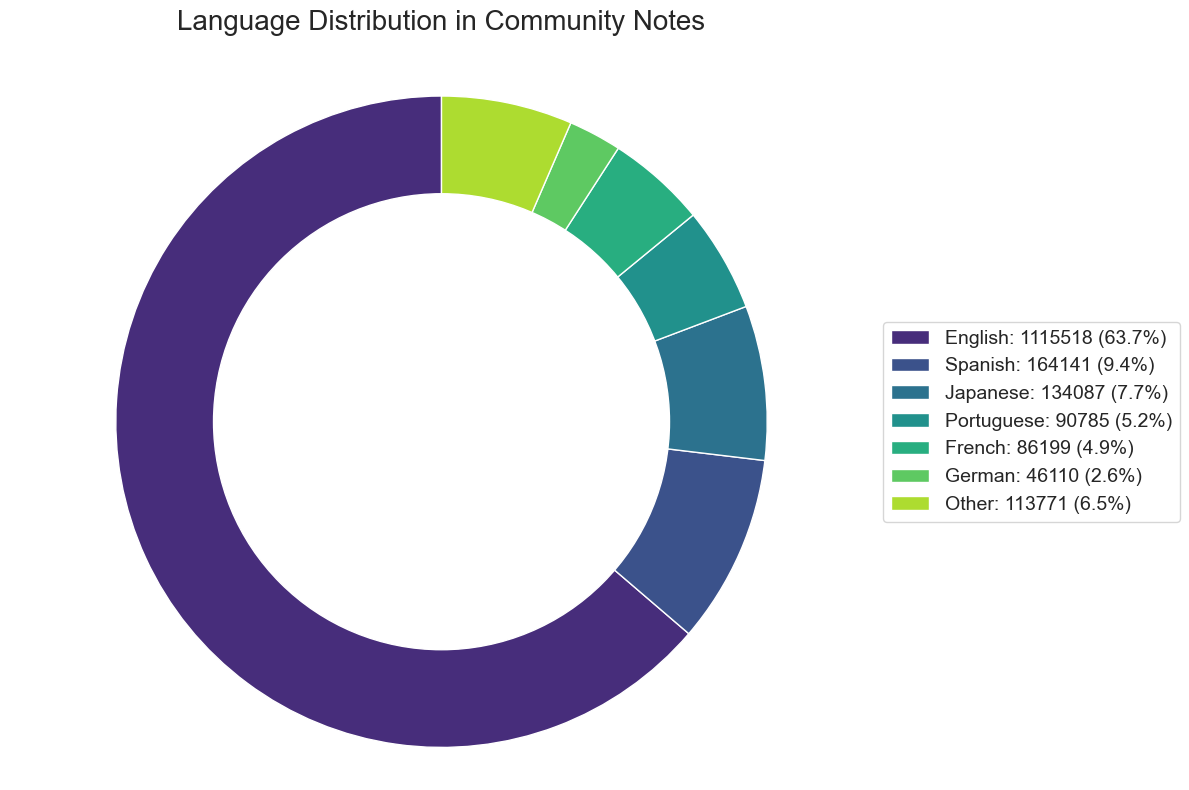

In [25]:
# Set the style for better visualization
sns.set_style("whitegrid")
plt.figure(figsize=(12, 8))  # Changed from (10, 8) to make it wider

# The rest of your data preparation code remains the same
# ...

# Create the pie chart
plt.pie(plot_data, labels=None, colors=colors, autopct='', startangle=90, shadow=False)

# Add a circle at the center to make it a donut chart
centre_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add legend with larger font size
plt.legend(labels, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=14)  # Increased fontsize

# Add title with larger font size
plt.title('Language Distribution in Community Notes', fontsize=20, pad=24)  # Increased fontsize
plt.axis('equal')

# Save the figure with a tighter layout
output_path = "../data/english_only/language_distribution.png"
plt.savefig(output_path, bbox_inches='tight', dpi=300)
print(f"Pie chart saved to {output_path}")

# Display the chart
plt.tight_layout()  # Added tight_layout to adjust spacing
plt.show()

# Print statistics

In [24]:
# output the langdetect result to a new tsv
language_mapping_filepath = "../data/english_only/note_language_mapping.tsv"
notes_df[['noteId', 'language']].to_csv(language_mapping_filepath, sep='\t', index=False)
print(f"Note-language mapping saved to {language_mapping_filepath}")

Note-language mapping saved to ../data/english_only/note_language_mapping.tsv


# Document Length

In [26]:
import re

# Count the number of URLs in each note
english_notes_df["url_count"] = english_notes_df["summary"].apply(lambda x: len(re.findall(r'http\S+', str(x))))

# Remove URLs and special characters to get clean text
english_notes_df["clean_text"] = english_notes_df["summary"].apply(
    lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', re.sub(r'http\S+', '', str(x)))
)

# Calculate the number of characters and words in each cleaned note
english_notes_df["char_length"] = english_notes_df["clean_text"].apply(len)
english_notes_df["word_count"] = english_notes_df["clean_text"].apply(lambda x: len(x.split()))

# Compute average statistics
avg_char_len = english_notes_df["char_length"].mean()
avg_word_count = english_notes_df["word_count"].mean()
avg_url_count = english_notes_df["url_count"].mean()

print(f"Average character count per note: {avg_char_len:.2f}")
print(f"Average word count per note: {avg_word_count:.2f}")
print(f"Average number of URLs per note: {avg_url_count:.2f}")

/var/folders/r1/2mcrr6nx5hg7d13ln1lw2l5w0000gn/T/ipykernel_6401/259252530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_notes_df["url_count"] = english_notes_df["summary"].apply(lambda x: len(re.findall(r'http\S+', str(x))))
/var/folders/r1/2mcrr6nx5hg7d13ln1lw2l5w0000gn/T/ipykernel_6401/259252530.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_notes_df["clean_text"] = english_notes_df["summary"].apply(
/var/folders/r1/2mcrr6nx5hg7d13ln1lw2l5w0000gn/T/ipykernel_6401/259252530.py:12

Average character count per note: 166.90
Average word count per note: 27.41
Average number of URLs per note: 1.24


/var/folders/r1/2mcrr6nx5hg7d13ln1lw2l5w0000gn/T/ipykernel_6401/259252530.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_notes_df["word_count"] = english_notes_df["clean_text"].apply(lambda x: len(x.split()))
